In [17]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
import keras

In [43]:
#create base of pretrained model
base_model = InceptionV3()#weights='imagenet', include_top=False)
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_377 (Conv2D)             (None, 149, 149, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_377 (BatchN (None, 149, 149, 32) 96          conv2d_377[0][0]                 
__________________________________________________________________________________________________
activation_377 (Activation)     (None, 149, 149, 32) 0           batch_normalization_377[0][0]    
__________________________________________________________________________________________________
conv2d_378

# inbuilt model

16
000ee8b10d350940edc494529b7868abbe5ae954.jpg
img prediction:  [('n02807133', 'bathing_cap', 0.38339013), ('n04023962', 'punching_bag', 0.09470676), ('n03255030', 'dumbbell', 0.050878685)]


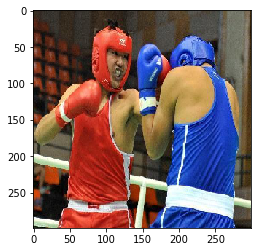

00b8d44619ad1144ff1ec9fe8d1b7ec5b908b20b.jpg
img prediction:  [('n02389026', 'sorrel', 0.6308255), ('n02437312', 'Arabian_camel', 0.0493269), ('n04049303', 'rain_barrel', 0.010211053)]


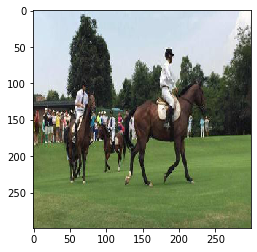

00dc8dd01fec5750c3a810e6f7a17dbe60d1b4ea.jpg
img prediction:  [('n02802426', 'basketball', 0.9449266), ('n04540053', 'volleyball', 0.0027761864), ('n04118538', 'rugby_ball', 0.0012118856)]


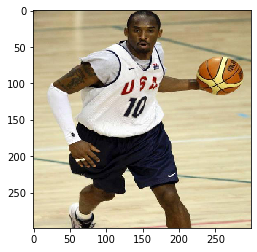

ADE_train_00000001.jpg
img prediction:  [('n04523525', 'vault', 0.6185311), ('n03661043', 'library', 0.13772742), ('n02795169', 'barrel', 0.048205946)]


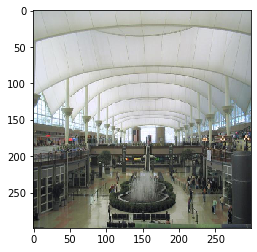

ADE_train_00000002.jpg
img prediction:  [('n04081281', 'restaurant', 0.47120547), ('n03032252', 'cinema', 0.20353766), ('n03661043', 'library', 0.08017378)]


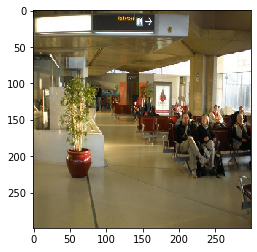

ADE_train_00000003.jpg
img prediction:  [('n03032252', 'cinema', 0.32200444), ('n04286575', 'spotlight', 0.13963957), ('n03529860', 'home_theater', 0.060387004)]


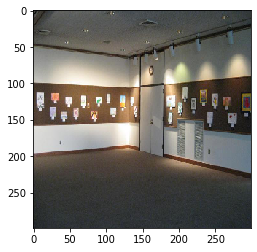

ADE_train_00000004.jpg
img prediction:  [('n09193705', 'alp', 0.3006118), ('n09468604', 'valley', 0.27298585), ('n09472597', 'volcano', 0.16411148)]


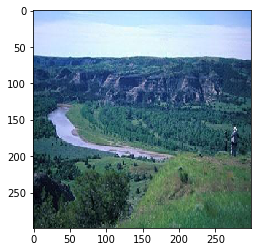

ADE_train_00000005.jpg
img prediction:  [('n03125729', 'cradle', 0.5006296), ('n04204238', 'shopping_basket', 0.1573942), ('n03131574', 'crib', 0.07945855)]


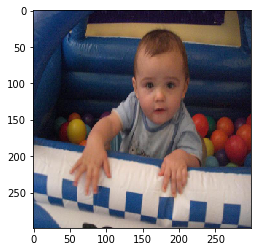

ADE_train_00000006.jpg
img prediction:  [('n02808440', 'bathtub', 0.48207128), ('n04553703', 'washbasin', 0.14979187), ('n04209239', 'shower_curtain', 0.13063641)]


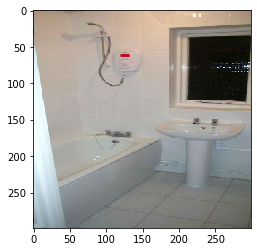

document.jpg
img prediction:  [('n06359193', 'web_site', 0.8215891), ('n07565083', 'menu', 0.022196703), ('n03291819', 'envelope', 0.0022001127)]


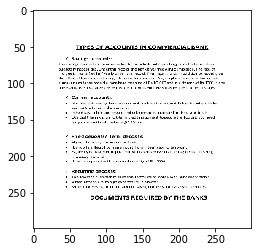

dog.jpg
img prediction:  [('n02110958', 'pug', 0.9139068), ('n02108422', 'bull_mastiff', 0.0033554796), ('n02112706', 'Brabancon_griffon', 0.0013211846)]


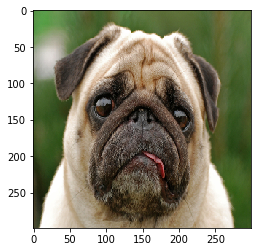

dog1.jpg
img prediction:  [('n02099601', 'golden_retriever', 0.81540185), ('n02099712', 'Labrador_retriever', 0.023992965), ('n02113799', 'standard_poodle', 0.0072869672)]


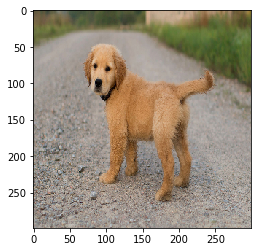

dog2.png
img prediction:  [('n02091244', 'Ibizan_hound', 0.14849223), ('n02100583', 'vizsla', 0.12041282), ('n02099712', 'Labrador_retriever', 0.0869939)]


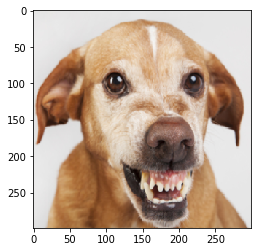

elephant.jpg
img prediction:  [('n02504458', 'African_elephant', 0.84017533), ('n01871265', 'tusker', 0.09380121), ('n02504013', 'Indian_elephant', 0.0032648745)]


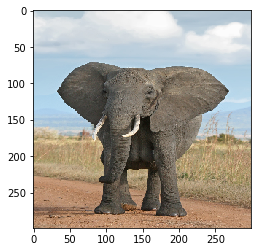

elephant1.jpg
img prediction:  [('n02504013', 'Indian_elephant', 0.9009085), ('n01871265', 'tusker', 0.037261523), ('n02504458', 'African_elephant', 0.014502161)]


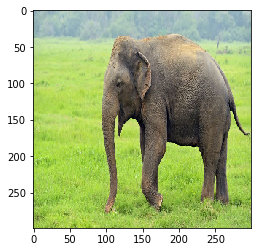

elephant2.jpg
img prediction:  [('n02504013', 'Indian_elephant', 0.83357394), ('n01871265', 'tusker', 0.14020556), ('n02504458', 'African_elephant', 0.0028681785)]


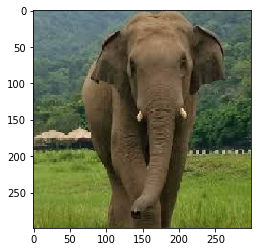

In [44]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
def classify(model):
    main_path = %pwd
    img_path = r'C:\Users\rajeevranjan.sharma\project\dl\data\test_img/'
    total_list = os.listdir(img_path)
    print(len(total_list))
    ext = ['jpg', 'png', 'tif']

    for enty in total_list:
        if enty.split('.')[1] in ext:
            print(enty)
            img = image.load_img(img_path+enty, target_size=(299,299))
            np_x = image.img_to_array(img)
            x = np.expand_dims(np_x, axis=0)
            x = preprocess_input(x)

            pred = model.predict(x)

            print("img prediction: ", decode_predictions(pred, top=3)[0])
            #print("img prediction: ", decode_predictions(pred))
            #show images
            plt.imshow(img, cmap='gray')
            plt.show()
            
classify(base_model)

# Fine-tune InceptionV3 on a new set of classes

In [214]:
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)
base_model.summary()
# from keras.applications.inception_v3 import InceptionV3
# from keras.layers import Input

# input_tensor = Input(shape=(150, 150, 3))  # this assumes K.image_data_format() == 'channels_last'

# base_model = InceptionV3(weights='imagenet', input_shape=[150, 150, 3], include_top=False)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_941 (Conv2D)             (None, None, None, 3 864         input_12[0][0]                   
__________________________________________________________________________________________________
batch_normalization_941 (BatchN (None, None, None, 3 96          conv2d_941[0][0]                 
__________________________________________________________________________________________________
activation_941 (Activation)     (None, None, None, 3 0           batch_normalization_941[0][0]    
__________________________________________________________________________________________________
conv2d_942

In [212]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(102, activation='relu')(x)
predictions = Dense(1040, activation='softmax')(x)

model = Model(inputs = base_model.input, output=predictions)

ValueError: Input 0 is incompatible with layer global_average_pooling2d_5: expected ndim=4, found ndim=2

In [202]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False
    #print(layer.name)

In [203]:
model.compile(optimizer=keras.optimizers.RMSprop(), loss= keras.losses.categorical_crossentropy)

In [204]:
#train the model on the new data for a few epoch
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_471 (Conv2D)             (None, None, None, 3 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_471 (BatchN (None, None, None, 3 96          conv2d_471[0][0]                 
__________________________________________________________________________________________________
activation_471 (Activation)     (None, None, None, 3 0           batch_normalization_471[0][0]    
__________________________________________________________________________________________________
conv2d_472

# Preprocessing

In [55]:
#!pip install opencv
#!pip install opencv-python==4.1.0.25

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2, random
from keras.utils import to_categorical

In [157]:
def preprocessing(dataname):
    train_X, train_Y = [],[]
    img_path = r'C:\Users\rajeevranjan.sharma\project\dl\data\sceen_classes\ADEChallengeData2016\images\training'
    total_list = dataname #os.listdir(img_path)
    #print(len(total_list))
    #ext = ['jpg', 'png', 'tif']

    for entry in total_list:
        name, label = entry.split(' ')
        label = label.replace('\n',"")
        img_name = os.path.join(img_path , name+'.jpg')
        numpy = cv2.imread(img_name)
        #print(numpy.shape)
        if np.all(numpy) != None:
            img_resize = cv2.resize(numpy, (299,299), interpolation = cv2.INTER_AREA)
            #img_resize = numpy.resize((299,299))
        
            train_X.append(img_resize)
            train_Y.append(label)
        #break
        
    train_X = np.asarray(train_X)
    train_Y =  np.asarray(train_Y)
    
    return train_X, train_Y


data_path = r'C:\Users\rajeevranjan.sharma\project\dl\data\sceen_classes\ADEChallengeData2016/'

f= open(data_path + 'sceneCategories.txt',"r+")

train_X, train_Y = preprocessing(f)
print("Shape of data:", train_X.shape, train_Y.shape)

Shape of data: (20210, 299, 299, 3) (20210,)


# Visulaize the training data

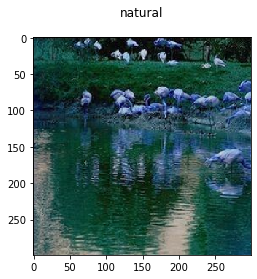

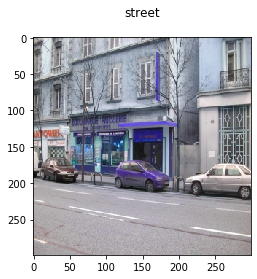

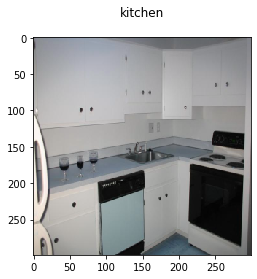

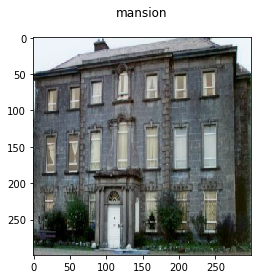

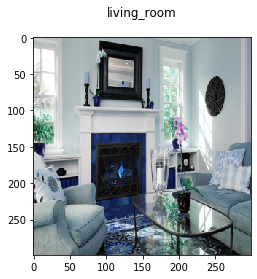

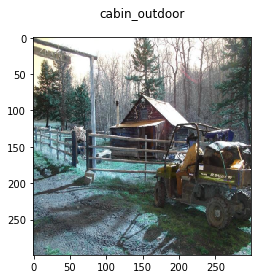

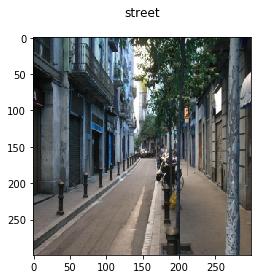

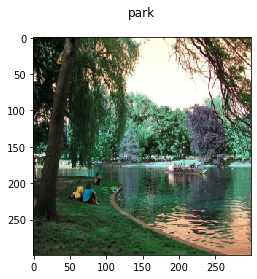

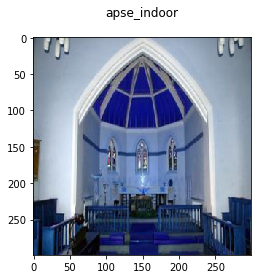

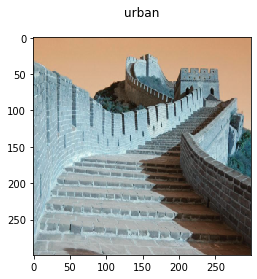

In [149]:
for ind in range(0, 10):
    rand_ind = random.randint(0, len(train_X))
    #print(rand_ind)
    plt.imshow(train_X[rand_ind])
    plt.title(train_Y[rand_ind])
    plt.show()
    

# Train the fine tune model

In [161]:
df = pd.DataFrame(train_Y)
df.head()

,0
0,airport_terminal
1,airport_terminal
2,art_gallery
3,badlands
4,ball_pit


In [170]:
len(np.unique(train_Y))

1040

In [199]:
from sklearn.preprocessing import LabelEncoder
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(train_Y)
encoded_Y = encoder.transform(train_Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_Y)
train_Y = dummy_y

print("Shape of data:", train_X.shape, train_Y.shape)

Shape of data: (20210, 299, 299, 3) (20210, 1040)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B1D4FCEB8>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

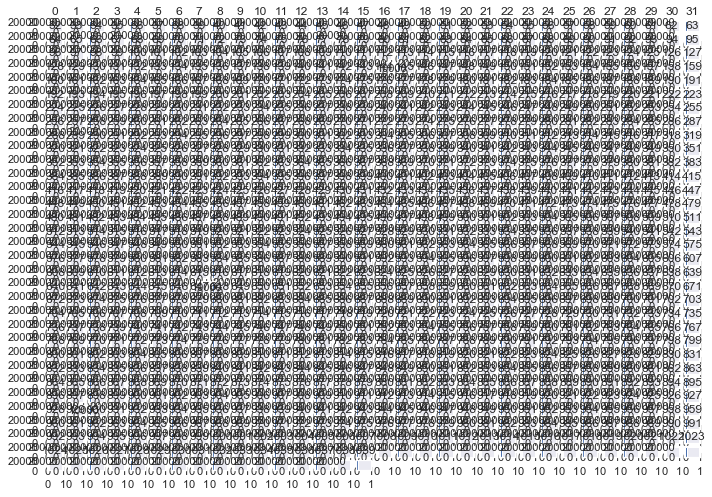

In [207]:
pd.DataFrame(train_Y).hist()

In [215]:
his = model.fit(train_X, train_Y, epoches = 10, batch_size=132, validation_split=0.1)

In [208]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_471 (Conv2D)             (None, None, None, 3 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_471 (BatchN (None, None, None, 3 96          conv2d_471[0][0]                 
__________________________________________________________________________________________________
activation_471 (Activation)     (None, None, None, 3 0           batch_normalization_471[0][0]    
__________________________________________________________________________________________________
conv2d_472